# Optimizing Stock Trading Strategy with K-Means Clustering

**Authors**: [Amey Thakur](https://github.com/Amey-Thakur) & [Mega Satish](https://github.com/msatmod)  
**Institution**: [Terna Engineering College](https://ternaengg.ac.in/)  
**Curriculum**: Big Data Analytics (BDA) Mini Project | Semester VII

---

### Project Overview
This project implements a stock market clustering analysis using the K-Means algorithm. By analyzing historical price movements (volatility and return), it groups similar companies together to identify patterns and potential trading strategies.


<a href="https://colab.research.google.com/github/Amey-Thakur/BIG-DATA-ANALYTICS-AND-COMPUTATIONAL-LAB-I/blob/main/Stock_market_clustering_with_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn.preprocessing import Normalizer
from collections import OrderedDict

In [ ]:
companies_dict = OrderedDict({
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Symantec':'SYMC',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mistubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'})

In [ ]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '2015-01-01' 
end_date = '2017-12-31'
df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

In [ ]:
df.head()

Attributes        High                         ...  Adj Close                      
Symbols           AMZN        AAPL        WBA  ...        VLO          F        BAC
Date                                           ...                                 
2015-01-02  314.750000  111.440002  77.190002  ...  41.933811  11.232167  16.546610
2015-01-05  308.380005  108.650002  75.900002  ...  40.209476  10.793411  16.065928
2015-01-06  303.000000  107.430000  76.000000  ...  39.718002  10.691036  15.585244
2015-01-07  301.279999  108.199997  76.690002  ...  39.409786  10.998164  15.659194
2015-01-08  303.140015  112.150002  77.940002  ...  41.667255  11.276045  15.982731

[5 rows x 168 columns]

In [ ]:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T

In [ ]:
stock_close.shape

(28, 755)

In [ ]:
movements  = stock_close - stock_open

In [ ]:
movements.shape

(28, 755)

In [ ]:
sum_of_movement = np.sum(movements,1)

In [ ]:
for i in range(len(companies_dict)):
  print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))



company:AMZN, Change:-82.730224609375
company:AAPL, Change:16.689895629882812
company:WBA, Change:-5.6500701904296875
company:NOC, Change:75.39007568359375
company:BA, Change:102.7198486328125
company:LMT, Change:60.23992919921875
company:MCD, Change:51.34001922607422
company:INTC, Change:19.86003303527832
company:NAV, Change:-0.2399907112121582
company:IBM, Change:15.639968872070312
company:TXN, Change:29.139911651611328
company:MA, Change:24.589866638183594
company:MSFT, Change:28.760025024414062
company:GE, Change:4.653881072998047
company:SYMC, Change:13.229999542236328
company:AXP, Change:7.210105895996094
company:PEP, Change:38.079978942871094
company:KO, Change:12.15997314453125
company:JNJ, Change:31.659950256347656
company:TM, Change:-17.310104370117188
company:HMC, Change:-8.060001373291016
company:MSBHY, Change:30.540021896362305
company:SNE, Change:-0.25998878479003906
company:XOM, Change:9.899986267089844
company:CVX, Change:26.569992065429688
company:VLO, Change:29.459995

In [ ]:
# VISUALIZATION OF DATA

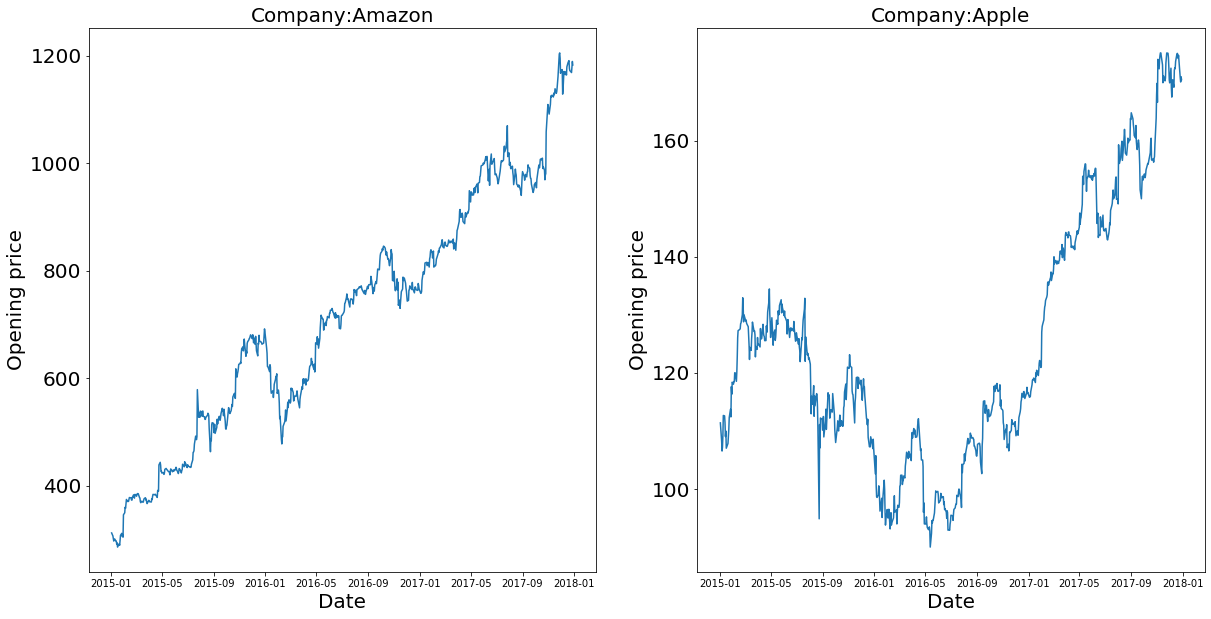

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.subplot(1,2,1) # Subplot 1
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Opening price',fontsize = 20)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) # Subplot 2
plt.title('Company:Apple',fontsize = 20) 
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Opening price',fontsize = 20)
plt.plot(df['Open']['AAPL'])

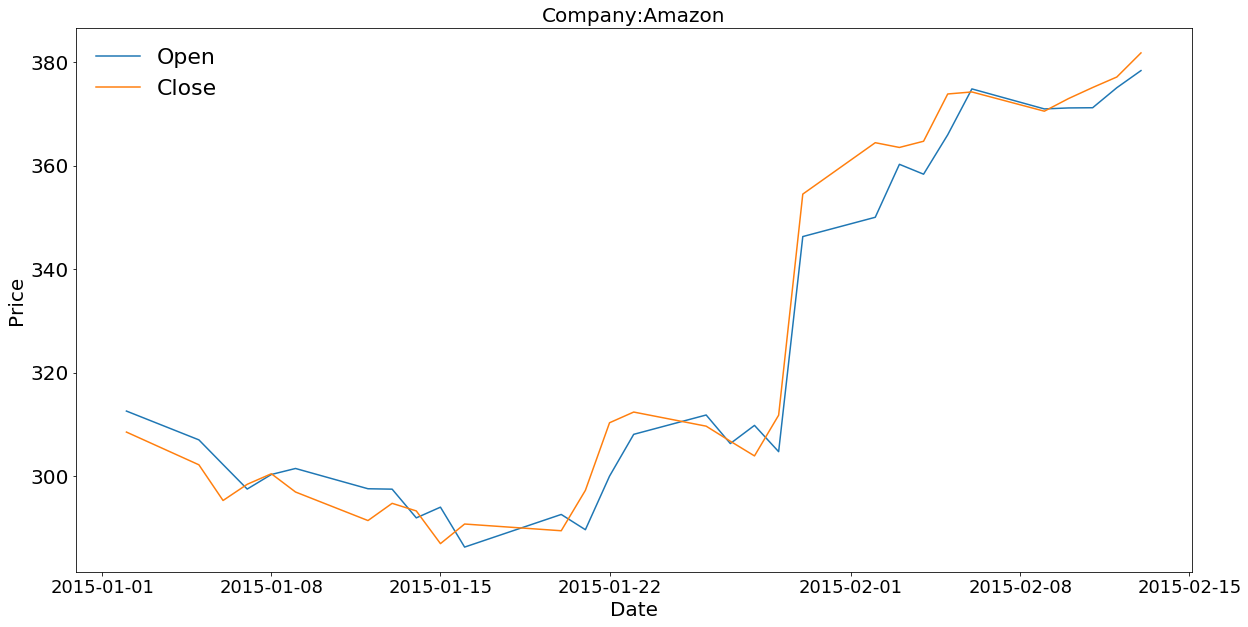

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

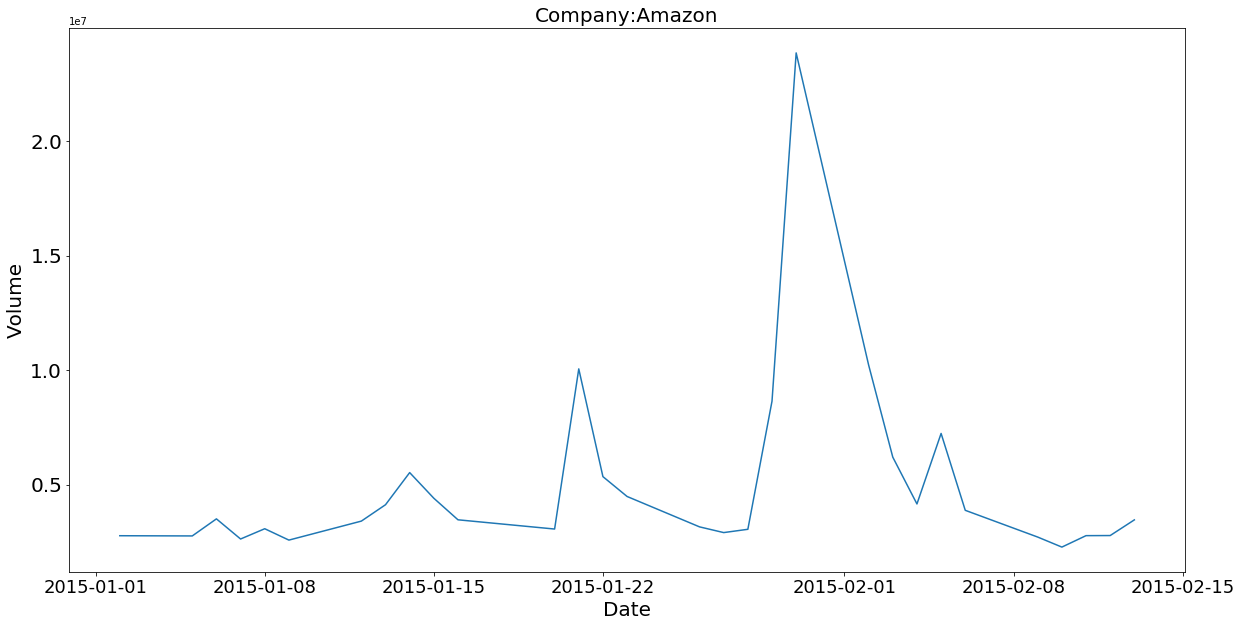

In [ ]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df.iloc[0:30]['Volume']['AMZN'],label = 'Open') 

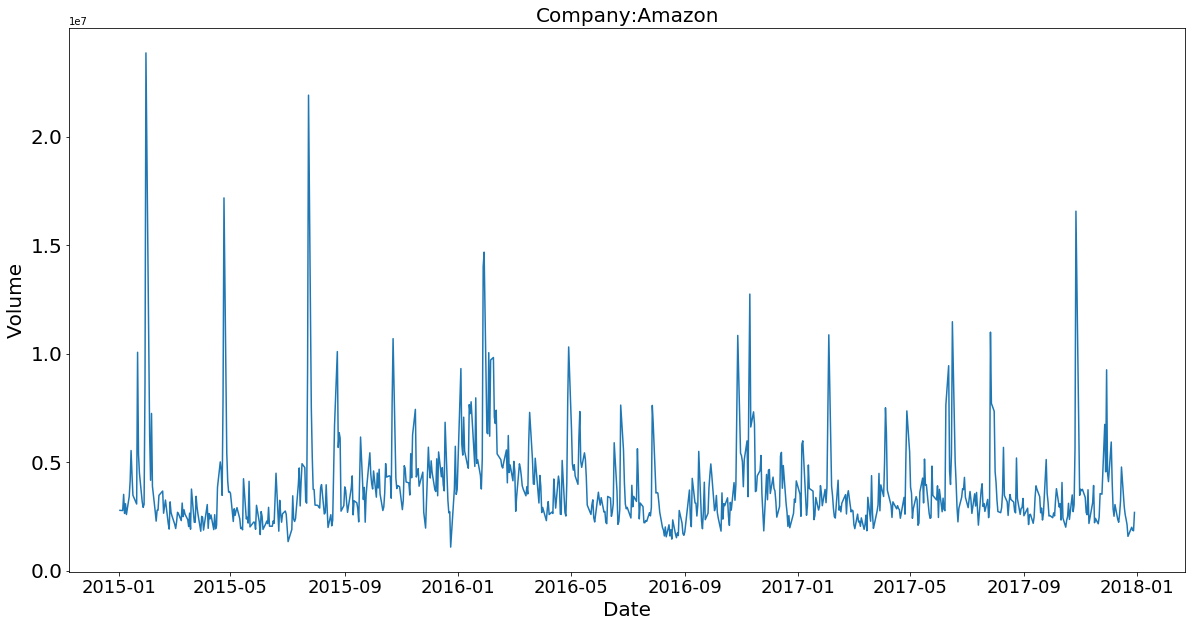

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open') # Volume prices of first 30 days are plotted against date

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime



fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open']['AMZN'],
                high=df['High']['AMZN'],
                low=df['Low']['AMZN'],
                close=df['Close']['AMZN'])])

fig.show()

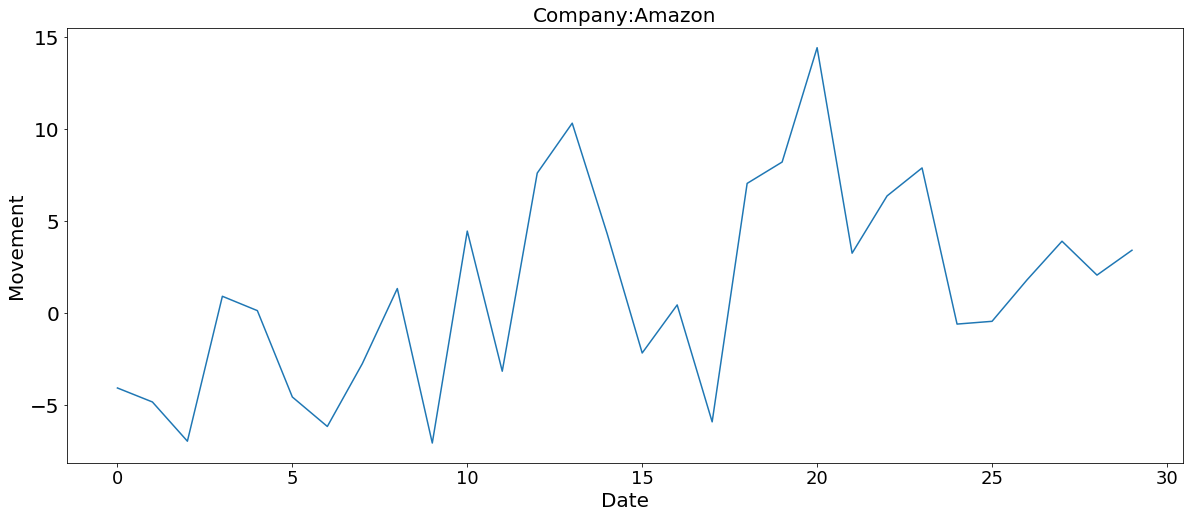

In [ ]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30]) 

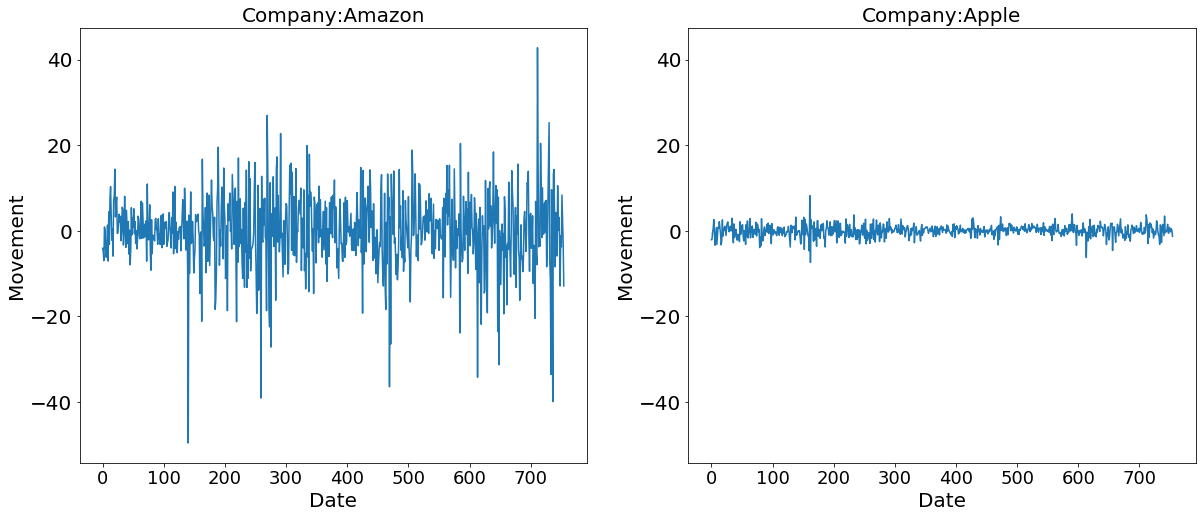

In [ ]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1]) 

In [ ]:
a = Normalizer()
norm_movements = a.fit_transform(movements)

In [ ]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.25991072682969973
0.2604577827945872
0.0010772940736902613


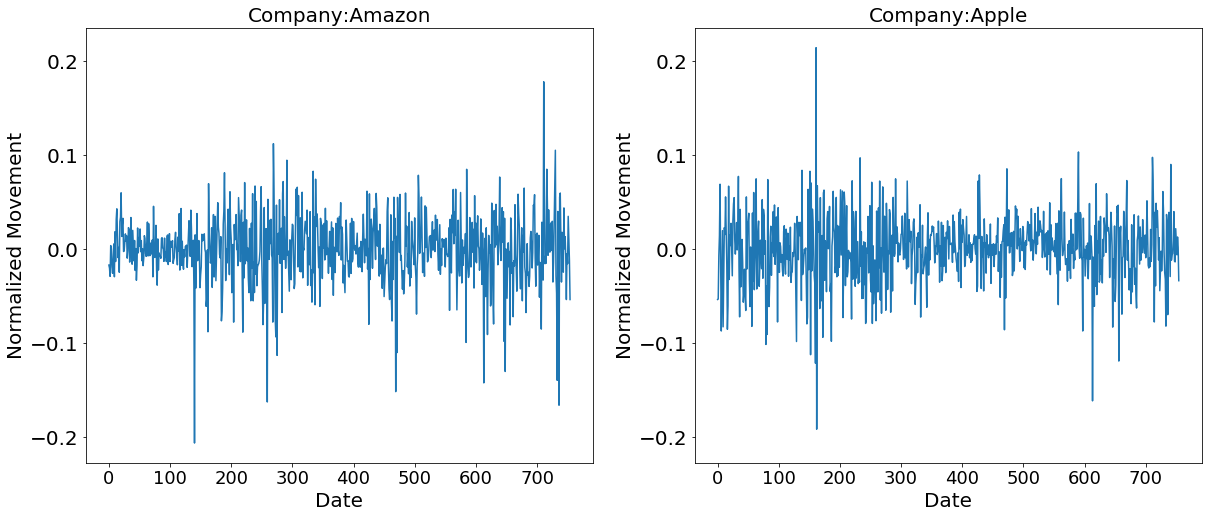

In [ ]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Normalized Movement',fontsize = 20)
plt.plot(norm_movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Normalized Movement',fontsize = 20)
plt.plot(norm_movements[1])

In [ ]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Define a normalizer
normalizer = Normalizer()

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

labels = pipeline.predict(movements)

In [ ]:
labels

array([5, 0, 1, 2, 2, 2, 8, 0, 7, 0, 0, 5, 5, 1, 0, 3, 4, 4, 8, 1, 1, 9,
       1, 6, 6, 1, 1, 3], dtype=int32)

In [ ]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)


In [ ]:
df1

,labels,companies
1,0,Apple
7,0,Intel
9,0,IBM
10,0,Texas Instruments
14,0,Symantec
13,1,General Electrics
2,1,Walgreen
25,1,Valero Energy
22,1,Sony
20,1,Honda


In [ ]:
kmeans.inertia_

9.72571931103608

In [ ]:
from sklearn.decomposition import PCA

# Define a normalizer
normalizer = Normalizer()

# Reduce the data
reduced_data = PCA(n_components = 2)

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

# Prediction
labels = pipeline.predict(movements)

# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)



In [ ]:
df2

,labels,companies
2,0,Walgreen
4,0,Boeing
22,1,Sony
7,1,Intel
27,2,Bank of America
26,2,Ford
8,2,Navistar
10,3,Texas Instruments
11,3,MasterCard
1,3,Apple


<Figure size 432x288 with 0 Axes>

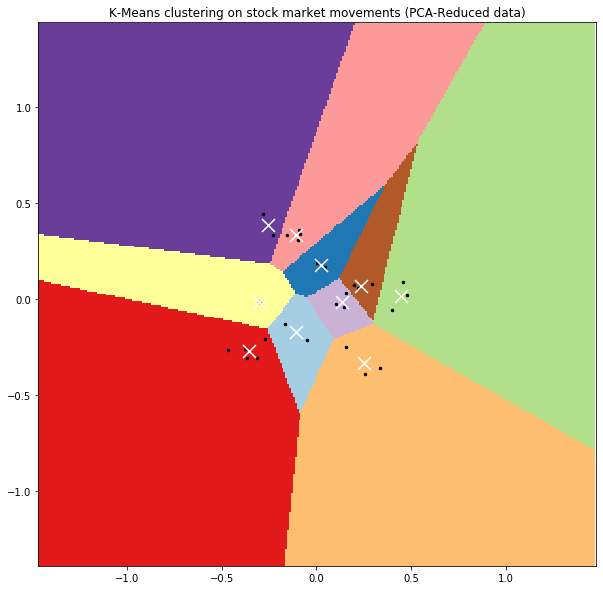

In [ ]:
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')


plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)

plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()
